<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Convolutional Neural Network with Batch-Normalization </h1> 


<h3>Objective<h3>    
<h5>Learn how to compare a Convolutional Neural Network using Batch Normalization with a regular Convolutional Neural Network  to classify handwritten digits from the MNIST database.</h5>     



<h2>Table of Contents</h2>
<b>This lab takes a long time to run so the results are given. You can run the notebook your self but it may take a long time.</b>
<p>In this lab, we will compare a Convolutional Neural Network using Batch Normalization with a regular Convolutional Neural Network  to classify handwritten digits from the MNIST database. We will reshape the images to make them faster to process. </p>

<ul>
    <li><a href="#read_me">Read me Batch Norm for Convolution Operation  </a></li>
<li><a href="#Makeup_Data">Get Some Data</a></li>
<li><a href="#CNN">Two Types of Convolutional Neural Network</a></li>
<li><a href="#Train">Define Criterion function, Optimizer and Train the Model</a></li>
<li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


<a name="read_me"><h2 id="read_me">Read me Batch Norm for Convolution Operation  </h2></a>


Like a fully connected network, we create a <code>BatchNorm2d</code> object, but we apply it to the 2D convolution object. First, we create objects <code>Conv2d</code> object; we require the number of output channels, specified by the variable <code>OUT</code>.  


<code>self.cnn1 = nn.Conv2d(in_channels=1, out_channels=OUT, kernel_size=5, padding=2) </code>


We then create a Batch Norm  object for 2D convolution as follows:


<code>self.conv1_bn = nn.BatchNorm2d(OUT)</code>


The parameter out is the number of channels in the output. We can then apply batch norm  after  the convolution operation :


<code>x = self.cnn1(x)</code>
 <code> x=self.conv1_bn(x)</code>


<!--Empty Space for separating topics-->


<h2>Preparation</h2>


In [1]:
import torch  # Import the PyTorch library
import numpy as np  # Import the NumPy library

import torch.nn as nn  # Import the neural network module from PyTorch
import torchvision.transforms as transforms  # Import the transforms module for data augmentation
import torchvision.datasets as dsets  # Import the datasets module for accessing datasets
import matplotlib.pylab as plt  # Import the plotting library

def show_data(data_sample):

    # Display the image data from the data sample. Reshape it to the correct dimensions and use a grayscale colormap.
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

    # Set the title of the plot to display the label (y-value) of the data sample.
    plt.title('y = '+ str(data_sample[1]))


Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3
ERROR: Could not find a version that satisfies the requirement torchvision==0.9.1 (from versions: 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1)
ERROR: No matching distribution found for torchvision==0.9.1


<a name="Makeup_Data"><h2 id="Makeup_Data">Get the Data</h2> </a>


We create a transform to resize the image and convert it to a tensor :


In [2]:

IMAGE_SIZE = 16

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

Load the training dataset by setting the parameters <code>train </code> to <code>True</code>. We use the transform defined above.


In [3]:

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)

Load the testing dataset by setting the parameters train  <code>False</code>.


In [4]:
# Make the validating 

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

We can see the data type is long.


In [5]:
# Show the data type for each element in dataset

type(train_dataset[0][1])

int

Each element in the rectangular tensor corresponds to a number representing a pixel intensity as demonstrated by the following image.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.2.1imagenet.png" width="550" alt="MNIST data image">


Print out the fourth label 


In [6]:
# The label for the fourth data element

train_dataset[3][1]

1

Plot the fourth sample 


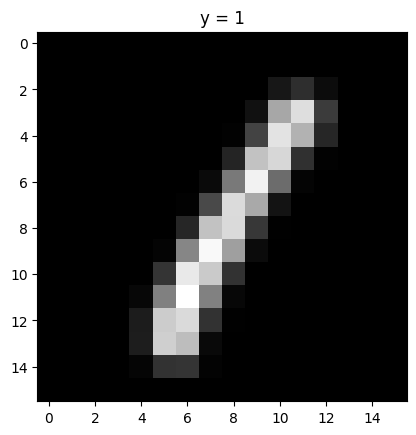

In [7]:
# The image for the fourth data element
show_data(train_dataset[3])


The fourth sample is a "1".


<!--Empty Space for separating topics-->


<a name="CNN"><h2 id="CNN">Build a Two Convolutional Neural Network Class</h2></a>


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.


In [8]:
import torch.nn as nn
import torch

class CNN(nn.Module):
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        """
        Initializes the CNN model.

        Args:
            out_1 (int): Number of output channels for the first convolutional layer. Default: 16.        
            out_2 (int): Number of output channels for the second convolutional layer. Default: 32.
        """
        super(CNN, self).__init__()

        # First convolutional layer
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)

        # First max pooling layer
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        # Second convolutional layer
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)

        # Second max pooling layer
        self.maxpool2=nn.MaxPool2d(kernel_size=2)

        # Fully connected layer
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)

    # Prediction
    def forward(self, x):
        """
        Forward pass of the CNN.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, channels, height, width).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes).
        """

        # First convolutional layer and activation
        x = self.cnn1(x)
        x = torch.relu(x)

        # First max pooling layer
        x = self.maxpool1(x)

        # Second convolutional layer and activation
        x = self.cnn2(x)
        x = torch.relu(x)

        # Second max pooling layer
        x = self.maxpool2(x)

        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)

        # Fully connected layer
        x = self.fc1(x)
        return x


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. But we add Batch Norm for the convolutional layers. 


In [9]:
class CNN_batch(nn.Module):
    """
    A simple convolutional neural network (CNN) with batch normalization.

    This CNN is designed for image classification, featuring two convolutional layers,
    max-pooling layers, and a fully connected layer. Batch normalization is applied
    after each convolutional and fully connected layer to improve training stability
    and performance.
    """
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        """
        Initializes the CNN_batch model.

        Args:
            out_1 (int): Number of output channels for the first convolutional layer. Default is 16.
            out_2 (int): Number of output channels for the second convolutional layer. Default is 32.
            number_of_classes (int): Number of output classes for the fully connected layer. Default is 10.
        """
        super(CNN_batch, self).__init__()
        # Convolutional layer 1 with Batch Normalization
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        # Max pooling layer 1
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        # Convolutional layer 2 with Batch Normalization
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        # Max pooling layer 2
        self.maxpool2=nn.MaxPool2d(kernel_size=2)

        # Fully connected layer 1 with Batch Normalization
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes) # out_2 * 4 * 4 is the flattened size of the feature maps after maxpool2
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        """
        Performs a forward pass through the CNN.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, channels, height, width).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, number_of_classes).
        """
        # Layer 1: Convolution -> Batch Normalization -> ReLU -> Max Pooling
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)

        # Layer 2: Convolution -> Batch Normalization -> ReLU -> Max Pooling
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)

        # Flatten the feature maps for the fully connected layer
        x = x.view(x.size(0), -1)

        # Fully connected layer -> Batch Normalization
        x = self.fc1(x)
        x=self.bn_fc1(x)

        return x


Function to train the model 


In [10]:
def train_model(model, train_loader, validation_loader, optimizer, n_epochs=4):
    """
    Trains a PyTorch model and evaluates its performance on a validation set.

    This function iterates through the specified number of epochs, performing training
    on the training data and calculating accuracy on the validation data after each epoch.

    Args:
        model (torch.nn.Module): The PyTorch model to train.
        train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
        validation_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
        optimizer (torch.optim.Optimizer): The optimizer used to update the model's parameters.
        n_epochs (int): The number of epochs to train for. Default is 4.
        criterion (torch.nn.modules.loss._Loss): The loss function. Default is CrossEntropyLoss.

    Returns:
        tuple: A tuple containing two lists:
            - accuracy_list (list): A list of validation accuracies after each epoch.
            - loss_list (list): A list of training losses after each batch. 
    """
    
    #global variable 
    N_test=len(validation_loader.dataset)     # Get the total number of samples in the validation dataset
    accuracy_list=[]
    loss_list=[]

    # Loop through each epoch
    for epoch in range(n_epochs):
        # Training loop for each batch in the training data
        for x, y in train_loader:
            # Set the model to training mode
            model.train()

            # Reset the gradients
            optimizer.zero_grad()

            # Forward pass
            z = model(x)

            # Calculate the loss
            loss = criterion(z, y)

            # Backpropagation
            loss.backward()

            # Update the model's parameters
            optimizer.step()

            # Store the training loss
            loss_list.append(loss.data)

        # Evaluation loop on validation data after each epoch
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            # Set the model to evaluation mode
            model.eval()

            # Forward pass
            z = model(x_test)

            # Get the predicted class labels
            _, yhat = torch.max(z.data, 1)

            # Count the number of correct predictions
            correct += (yhat == y_test).sum().item()

        # Calculate the validation accuracy
        accuracy = correct / N_test

        # Store the validation accuracy
        accuracy_list.append(accuracy)
     
    return accuracy_list, loss_list


<a name="Train"><h2 id="Train">Define the Convolutional Neural Network Classifier, Criterion function, Optimizer and Train the Model</h2> </a>


There are 16 output channels for the first layer, and 32 output channels for the second layer 


In [11]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32)

Define the loss function, the optimizer and the dataset loader 


In [12]:
# Define the loss function. CrossEntropyLoss is suitable for multi-class classification.
criterion = nn.CrossEntropyLoss()

# Set the learning rate for the optimizer.
learning_rate = 0.1

# Initialize the optimizer with the model's parameters and learning rate. Using Stochastic Gradient Descent (SGD).
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Create a data loader for the training dataset with a specified batch size.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)

# Create a data loader for the validation dataset with a specified batch size.
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)


Train the model and determine validation accuracy technically test accuracy **(This may take a long time)**


In [13]:
# Train the model
accuracy_list_normal, loss_list_normal = train_model(model=model,
                                                    n_epochs=10,
                                                    train_loader=train_loader,
                                                    validation_loader=validation_loader,
                                                    optimizer=optimizer)

Repeat the Process for the model with  batch norm 


In [ ]:
# Create a CNN_batch model with specified output channels for the two layers.
model_batch = CNN_batch(out_1=16, out_2=32) 

# Define the loss function as Cross-Entropy Loss.
criterion = nn.CrossEntropyLoss() 

# Set the learning rate.
learning_rate = 0.1 

# Define the optimizer as Stochastic Gradient Descent (SGD).
optimizer = torch.optim.SGD(model_batch.parameters(), lr=learning_rate)

# Train the model and store the accuracy and loss history.
accuracy_list_batch, loss_list_batch = train_model(
    model=model_batch,  # Pass the defined model
    n_epochs=10,  # Set the number of training epochs
    train_loader=train_loader,  # Provide the training data loader
    validation_loader=validation_loader,  # Provide the validation data loader
    optimizer=optimizer,  # Pass the defined optimizer
)


<!--Empty Space for separating topics-->


<a name="Result"><h2 id="Result">Analyze Results</h2> </a>


Plot the loss with both networks.


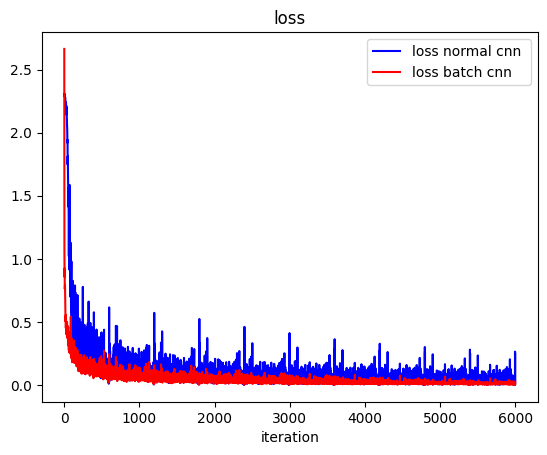

In [15]:
# Plot the loss values for the normal CNN (blue line)
plt.plot(loss_list_normal, 'b',label='loss normal cnn ')  # Plots normal CNN loss against iteration

# Plot the loss values for the batch-normalized CNN (red line)
plt.plot(loss_list_batch,'r',label='loss batch cnn') # Plots batch-normalized CNN loss against iteration
plt.xlabel('iteration') # Sets the x-axis label to "iteration"
plt.title("loss") # Sets the plot title to "loss"
plt.legend() # Displays the legend to differentiate the two lines


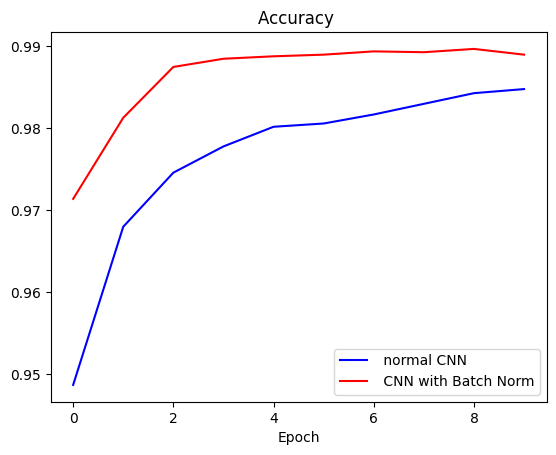

In [16]:
# Plot accuracy curves for normal CNN and CNN with batch normalization.

plt.plot(accuracy_list_normal, 'b',label=' normal CNN') # Plot accuracy of normal CNN (blue line).
plt.plot(accuracy_list_batch,'r',label=' CNN with Batch Norm') # Plot accuracy of CNN with batch normalization (red line).
plt.xlabel('Epoch') # Set x-axis label to "Epoch".
plt.title("Accuracy ") # Set plot title to "Accuracy".
plt.legend() # Display legend.
plt.show() # Show the plot.


We see the CNN with batch norm performers better, with faster convergence.



<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"></a>


<!--Empty Space for separating topics-->


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>


Thanks to Magnus <a href="http://www.hvass-labs.org/">Erik Hvass Pedersen</a> whose tutorials helped me understand convolutional Neural Network


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>-->

## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
